In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats



In [3]:
filename = '../data/meto_LNA/2006_2023.txt'

- Date - Data
- Time - Tempo
- Temp Out - Temperatura externa
- Hi Temp - Temperatura máxima
- Low Temp - Temperatura mínima
- Out Hum - Umidade externa
- Dew Pt. - Ponto de orvalho
- Wind Speed - Velocidade do vento
- Wind Dir - Direção do vento
- Wind Run - Deslocamento do vento
- Hi Wind Speed - Velocidade máxima do vento
- Wind Chill - Sensação térmica devido ao vento
- Heat Index - Índice de calor
- THW Index - Índice THW (leva em conta temperatura, umidade e velocidade do vento)
- Heat Int. - (Pode indicar um índice de calor interno ou outro valor relacionado ao calor)
- Cool - (Pode ser relacionado à refrigeração ou índice de resfriamento)
- In Bar - Pressão atmosférica interna
- In Rain - Precipitação interna
- In D-D - (Não é claro, pode necessitar de mais contexto ou ser um erro de digitação)
- In D-D - (Repetido, possivelmente um erro de digitação)
- In Temp - Temperatura interna
- In Hum - Umidade interna
- In Dew - Ponto de orvalho interno
- In Heat - (Pode indicar índice de calor interno ou outra medida de calor)
- Arc. - (Pode ser relacionado a arquivamento ou outra função)

In [4]:
#Definiendo nombres de la coulumna e  a Função para formatar data e hora


def format_date(row):
    day, month, year = row['date'].split('/')
    year = f"20{year}"  # Adicionando o prefixo "20" ao ano
    hour, minute = row['time'].split(':')
    hour = hour.zfill(2)
    minute = minute.zfill(2)
    return f"{year}/{month}/{day} {hour}:{minute}"

names=['date','time','temp_out','hi_temp','low_temp','out_hum','dew_pt','wind_speed',
       'wind_dir','win_run','hi_speed','wind_chill','heat_index','THW_index','bar','rain',
       'heat_DD','cool_DD','in_temp','in_hum','in_dew','in_heat','arc_int']


# Lendo o arquivo CSV e atribuindo os nomes  das colunas

data = pd.read_csv(filename, names=names,skiprows=2, delimiter='\t', header=None,)

data.head()

C:\Users\LPS04\AppData\Local\Temp\ipykernel_24644\1080827182.py:19: DtypeWarning: Columns (2,3,4,5,6,11,12,13,14,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=names,skiprows=2, delimiter='\t', header=None,)


,date,time,temp_out,hi_temp,low_temp,out_hum,dew_pt,wind_speed,wind_dir,win_run,...,THW_index,bar,rain,heat_DD,cool_DD,in_temp,in_hum,in_dew,in_heat,arc_int
0,01/09/06,0:05,17.9,17.9,17.8,68,11.9,27.4,ESE,2.28,...,14.7,1010.6,0.0,0.002,0.000,20.6,43,7.5,19.4,5
1,01/09/06,0:10,17.8,17.8,17.8,68,11.8,25.7,ESE,2.15,...,14.8,1010.6,0.0,0.002,0.000,20.5,44,7.8,19.4,5
2,01/09/06,0:15,17.8,17.8,17.8,68,11.8,29.0,ESE,2.41,...,14.4,1010.0,0.0,0.002,0.000,20.4,44,7.8,19.3,5
3,01/09/06,0:20,17.8,17.9,17.8,68,11.8,30.6,ESE,2.55,...,14.3,1010.0,0.0,0.002,0.000,20.4,44,7.8,19.3,5
4,01/09/06,0:25,17.9,17.9,17.9,68,12.0,30.6,ESE,2.55,...,14.4,1010.0,0.0,0.001,0.000,20.4,44,7.8,19.3,5


In [5]:
# criar a coluna 'datetime'
data['datetime'] = data.apply(lambda row: format_date(row), axis=1)

# Convertendo a coluna 'datetime' para o tipo datetime
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.set_index("datetime", drop=True).sort_index()

# Removendo as colunas originais 'date' e 'time'
data.drop(["date", "time"], inplace=True, axis=1)

data.head()

,temp_out,hi_temp,low_temp,out_hum,dew_pt,wind_speed,wind_dir,win_run,hi_speed,wind_chill,...,THW_index,bar,rain,heat_DD,cool_DD,in_temp,in_hum,in_dew,in_heat,arc_int
datetime,,,,,,,,,,,,,,,,,,,,,
2006-09-01 00:05:00,17.9,17.9,17.8,68,11.9,27.4,ESE,2.28,32.2,14.8,...,14.7,1010.6,0.0,0.002,0.000,20.6,43,7.5,19.4,5
2006-09-01 00:10:00,17.8,17.8,17.8,68,11.8,25.7,ESE,2.15,32.2,14.9,...,14.8,1010.6,0.0,0.002,0.000,20.5,44,7.8,19.4,5
2006-09-01 00:15:00,17.8,17.8,17.8,68,11.8,29.0,ESE,2.41,32.2,14.6,...,14.4,1010.0,0.0,0.002,0.000,20.4,44,7.8,19.3,5
2006-09-01 00:20:00,17.8,17.9,17.8,68,11.8,30.6,ESE,2.55,33.8,14.5,...,14.3,1010.0,0.0,0.002,0.000,20.4,44,7.8,19.3,5
2006-09-01 00:25:00,17.9,17.9,17.9,68,12.0,30.6,ESE,2.55,35.4,14.6,...,14.4,1010.0,0.0,0.001,0.000,20.4,44,7.8,19.3,5


In [6]:
# Convert numerical variables into float
numerical_variables = [
    'temp_out',
    'hi_temp',
    'low_temp',
    'out_hum',
    'dew_pt',
    'wind_speed',
    'win_run',
    'hi_speed',
    'wind_chill',
    'heat_index',
    'THW_index',
    'bar',
    'rain',
    'heat_DD',
    'cool_DD',
    'in_temp',
    'in_hum',
    'in_dew',
    'in_heat',
    'arc_int'
]
for variable in numerical_variables:
    # data[variable] = data[variable].astype(object)
    data[variable] = data[variable].replace('---', None) 
    data[variable] = data[variable].replace('------', None)
    data[variable] = data[variable].replace('', None) 
    data[variable] = data[variable].astype(np.float32)
data.head()

,temp_out,hi_temp,low_temp,out_hum,dew_pt,wind_speed,wind_dir,win_run,hi_speed,wind_chill,...,THW_index,bar,rain,heat_DD,cool_DD,in_temp,in_hum,in_dew,in_heat,arc_int
datetime,,,,,,,,,,,,,,,,,,,,,
2006-09-01 00:05:00,17.900000,17.900000,17.799999,68.0,11.9,27.400000,ESE,2.28,32.200001,14.8,...,14.7,1010.599976,0.0,0.002,0.0,20.6,43.0,7.5,19.400000,5.0
2006-09-01 00:10:00,17.799999,17.799999,17.799999,68.0,11.8,25.700001,ESE,2.15,32.200001,14.9,...,14.8,1010.599976,0.0,0.002,0.0,20.5,44.0,7.8,19.400000,5.0
2006-09-01 00:15:00,17.799999,17.799999,17.799999,68.0,11.8,29.000000,ESE,2.41,32.200001,14.6,...,14.4,1010.000000,0.0,0.002,0.0,20.4,44.0,7.8,19.299999,5.0
2006-09-01 00:20:00,17.799999,17.900000,17.799999,68.0,11.8,30.600000,ESE,2.55,33.799999,14.5,...,14.3,1010.000000,0.0,0.002,0.0,20.4,44.0,7.8,19.299999,5.0
2006-09-01 00:25:00,17.900000,17.900000,17.900000,68.0,12.0,30.600000,ESE,2.55,35.400002,14.6,...,14.4,1010.000000,0.0,0.001,0.0,20.4,44.0,7.8,19.299999,5.0


<AxesSubplot: xlabel='datetime'>

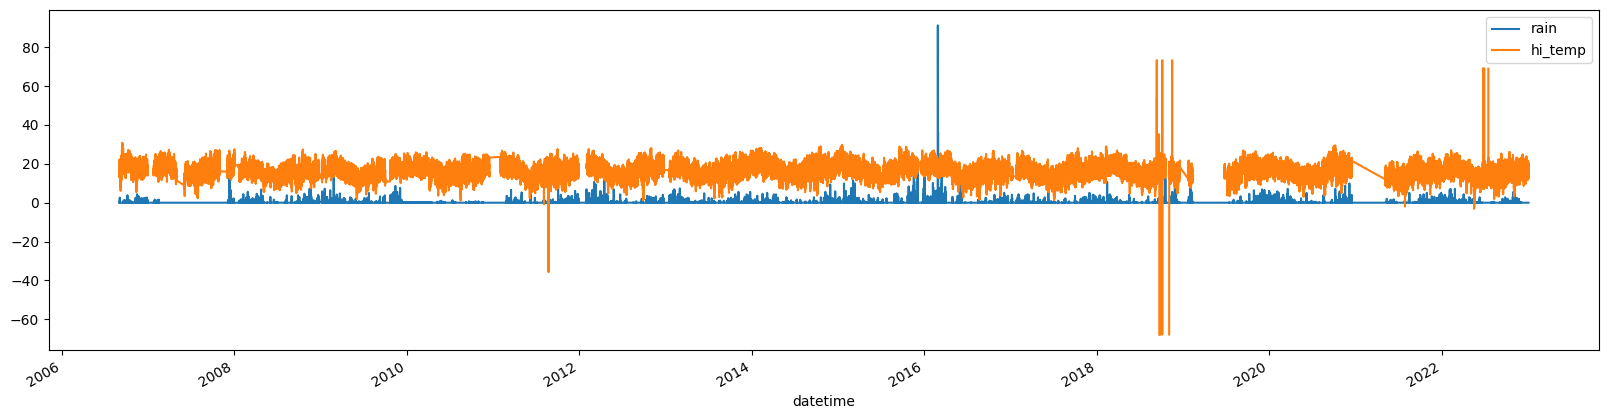

In [7]:
data[['rain', 'hi_temp']].plot(figsize=(20, 5))

In [8]:
# Esto define los parametros del grafico
def myfigstyle():
    # Reference:
    # http://space.mit.edu/home/turnerm/python.html
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['axes.labelsize'] = 13
    #plt.rcParams['legend.fontsize'] = 11
    plt.rcParams['path.simplify']    = True
    #plt.rcParams['figure.figsize'] = 7,6
    plt.rcParams['font.family']  = 'monospace'
    plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['xtick.major.size'] = 7
    plt.rcParams['ytick.major.size'] = 7 
    plt.rcParams['xtick.minor.size'] = 3    
    plt.rcParams['ytick.minor.size'] = 3
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['xtick.minor.width'] = 1
    plt.rcParams['ytick.minor.width'] = 1
    plt.rcParams['lines.markeredgewidth'] = 1
    plt.rcParams['legend.numpoints'] = 1
    plt.rcParams['legend.frameon'] = False
    plt.rcParams['legend.handletextpad'] = 0.3
    plt.rcParams['xtick.minor.visible'] = True
    plt.rcParams['ytick.minor.visible'] = True
    plt.rcParams['grid.color'] = 'k'
    plt.rcParams['grid.linestyle'] = ':'
    plt.rcParams['grid.linewidth'] = 0.5
    #grids
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    #start sticks
    #plt.rcParams['xtick.top'] = True
    #plt.rcParams['ytick.right'] = True
    # restore defaults
    # plt.rcdefaults()

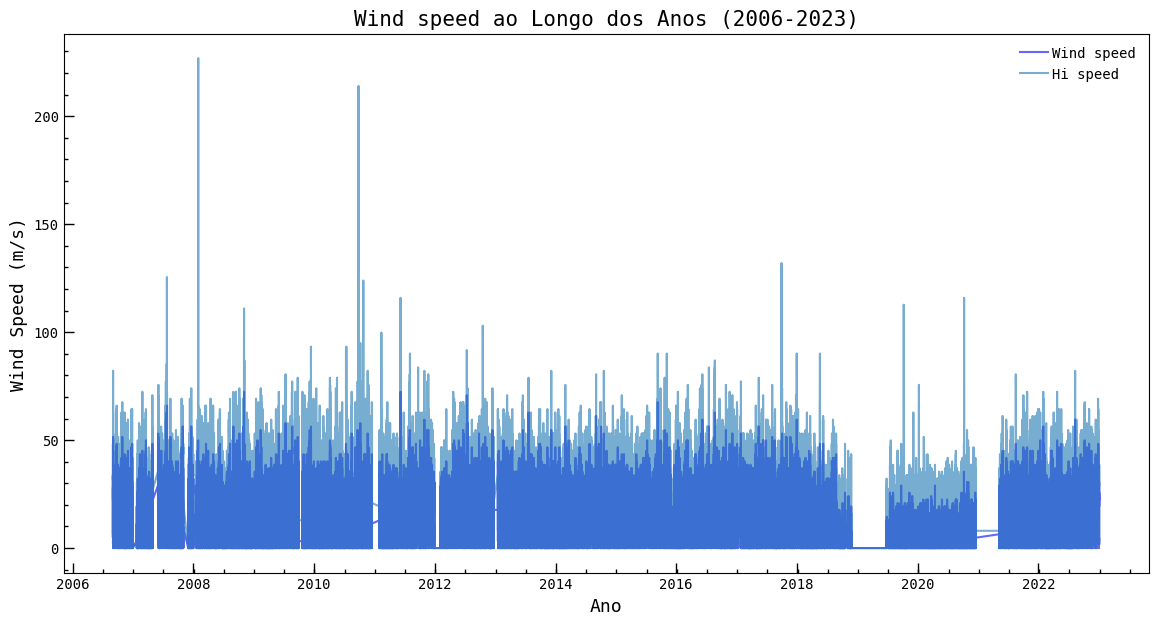

In [9]:

myfigstyle()

plt.rcParams['figure.figsize'] = 14,7

         
plt.plot(data.index, data['wind_speed'], label='Wind speed', alpha=0.6, color = 'blue')
plt.plot(data.index, (data['hi_speed']), label='Hi speed', alpha=0.6)
# Configurando os rótulos e título do gráfico
plt.xlabel('Ano')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind speed ao Longo dos Anos (2006-2023)')
plt.legend()




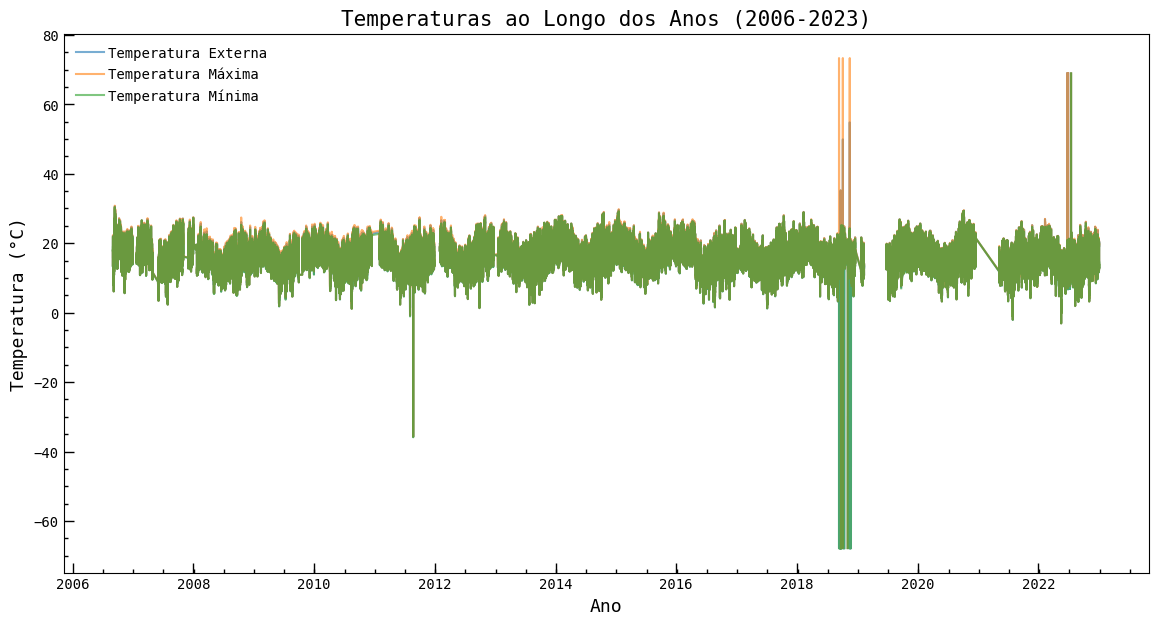

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['temp_out'], label='Temperatura Externa', alpha=0.6)
plt.plot(data.index, data['hi_temp'], label='Temperatura Máxima', alpha=0.6)
plt.plot(data.index, data['low_temp'], label='Temperatura Mínima', alpha=0.6)
# Configurando os rótulos e título do gráfico
plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')
plt.title('Temperaturas ao Longo dos Anos (2006-2023)')
plt.legend()
#plt.grid(True)

plt.show()

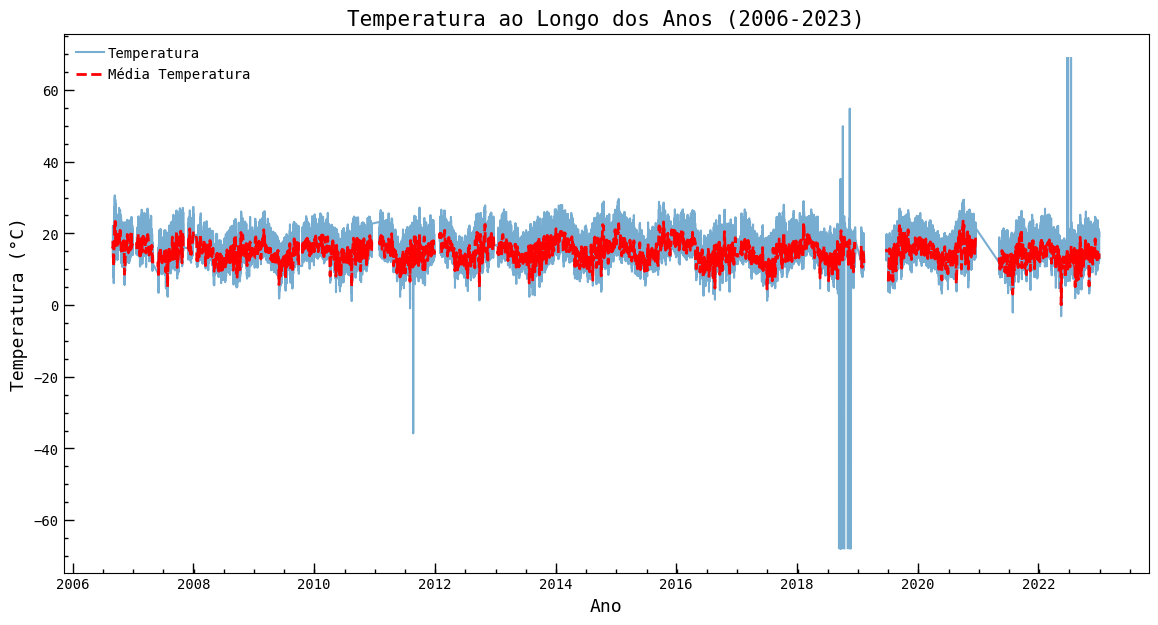

In [11]:
mean_data = data[['temp_out', 'hi_temp', 'low_temp']].resample('D').mean()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['temp_out'], label='Temperatura', alpha=0.6)

plt.plot(mean_data.index, mean_data['temp_out'], label='Média Temperatura ', color='red', linestyle='--', linewidth=2)

# Configurando os rótulos e título do gráfico
plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura ao Longo dos Anos (2006-2023)')
plt.legend()
#plt.grid(True)

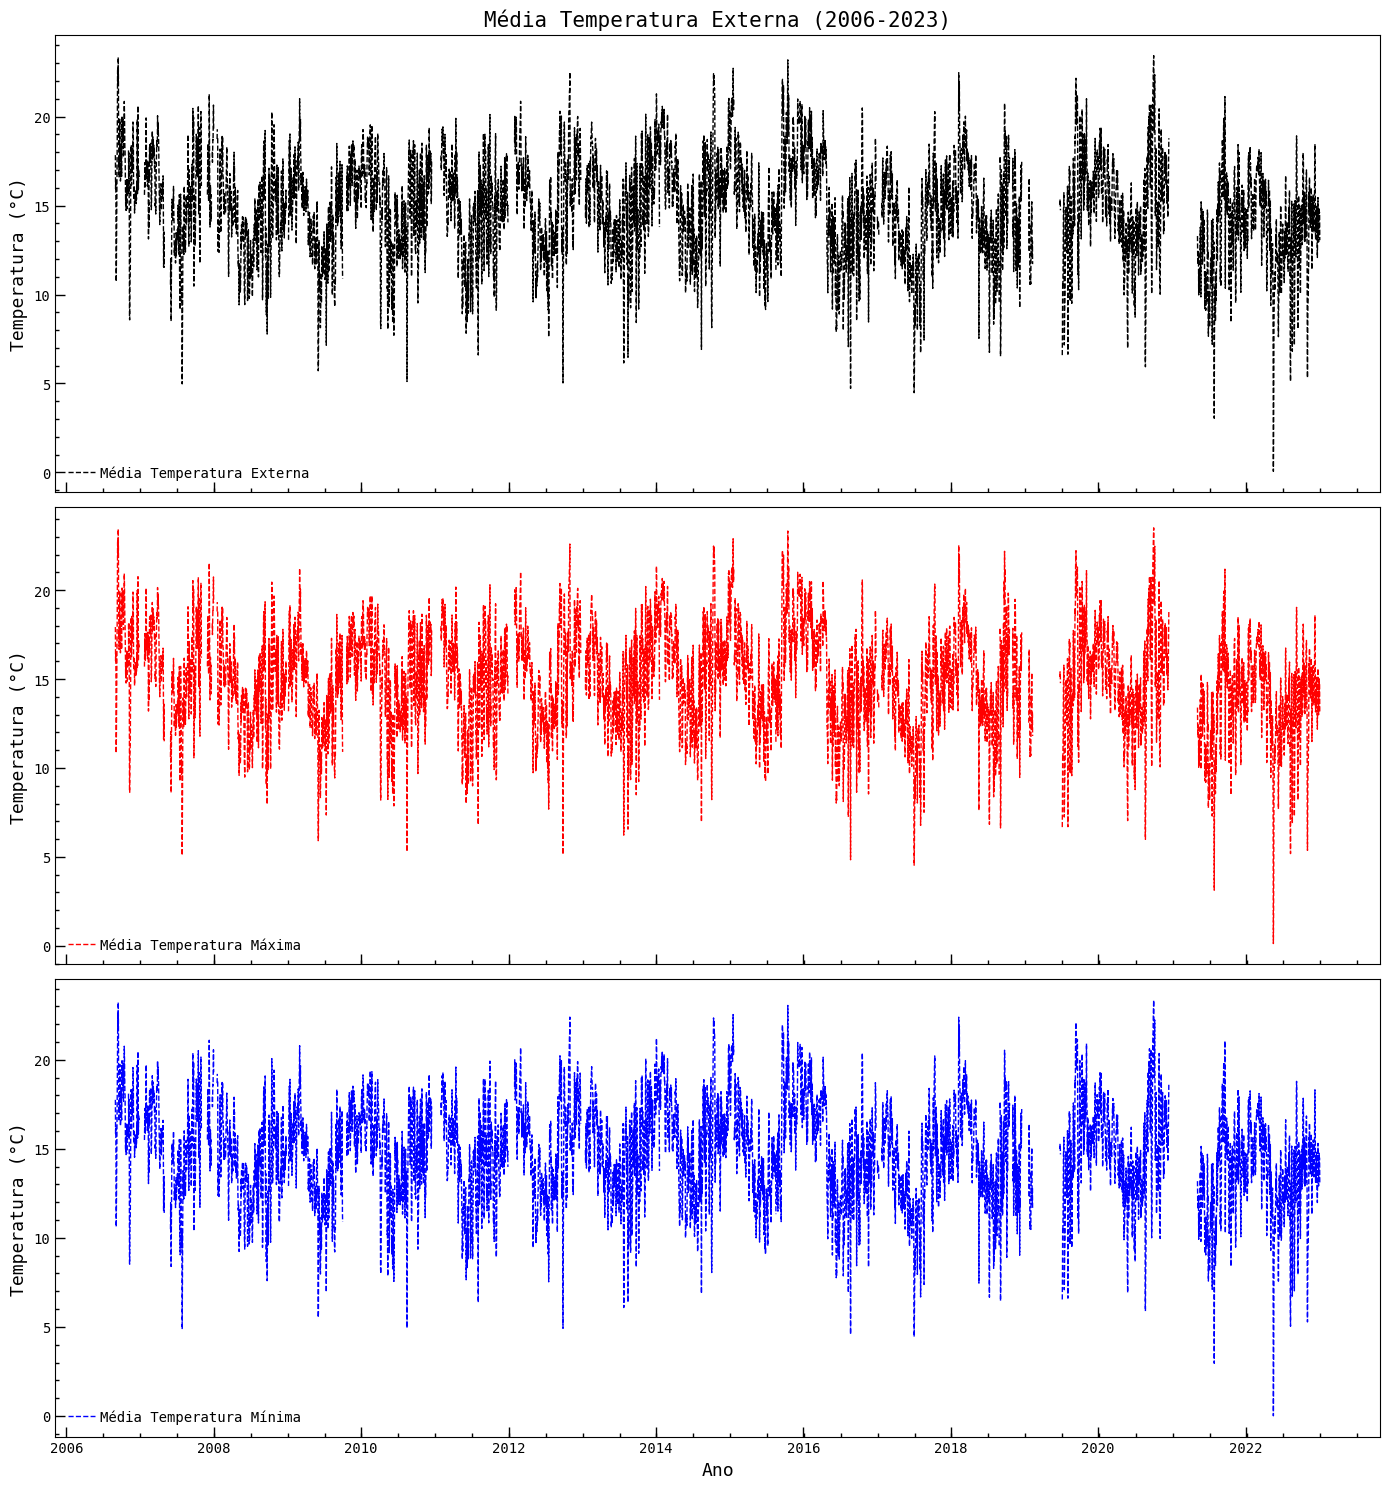

In [12]:
mean_data = data[['temp_out', 'hi_temp', 'low_temp']].resample('D').mean()

# Criando subplots
fig, axs = plt.subplots(3, 1, figsize=(14, 15), sharex=True)

# Plotando a média da temperatura externa
axs[0].plot(mean_data.index, mean_data['temp_out'], label='Média Temperatura Externa', color='black', linestyle='--', linewidth=1)
axs[0].set_ylabel('Temperatura (°C)')
axs[0].set_title('Média Temperatura Externa (2006-2023)')
axs[0].legend()
#axs[0].grid(True)

# Plotando a média da temperatura máxima
axs[1].plot(mean_data.index, mean_data['hi_temp'], label='Média Temperatura Máxima', color='red', linestyle='--', linewidth=1)
axs[1].set_ylabel('Temperatura (°C)')
#axs[1].set_title('Média Temperatura Máxima (2006-2023)')
axs[1].legend()
#axs[1].grid(True)

# Plotando a média da temperatura mínima
axs[2].plot(mean_data.index, mean_data['low_temp'], label='Média Temperatura Mínima', color='blue', linestyle='--', linewidth=1)
axs[2].set_ylabel('Temperatura (°C)')
axs[2].set_xlabel('Ano')
#axs[2].set_title('Média Temperatura Mínima (2006-2023)')
axs[2].legend()
#axs[2].grid(True)


# Ajustando layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()

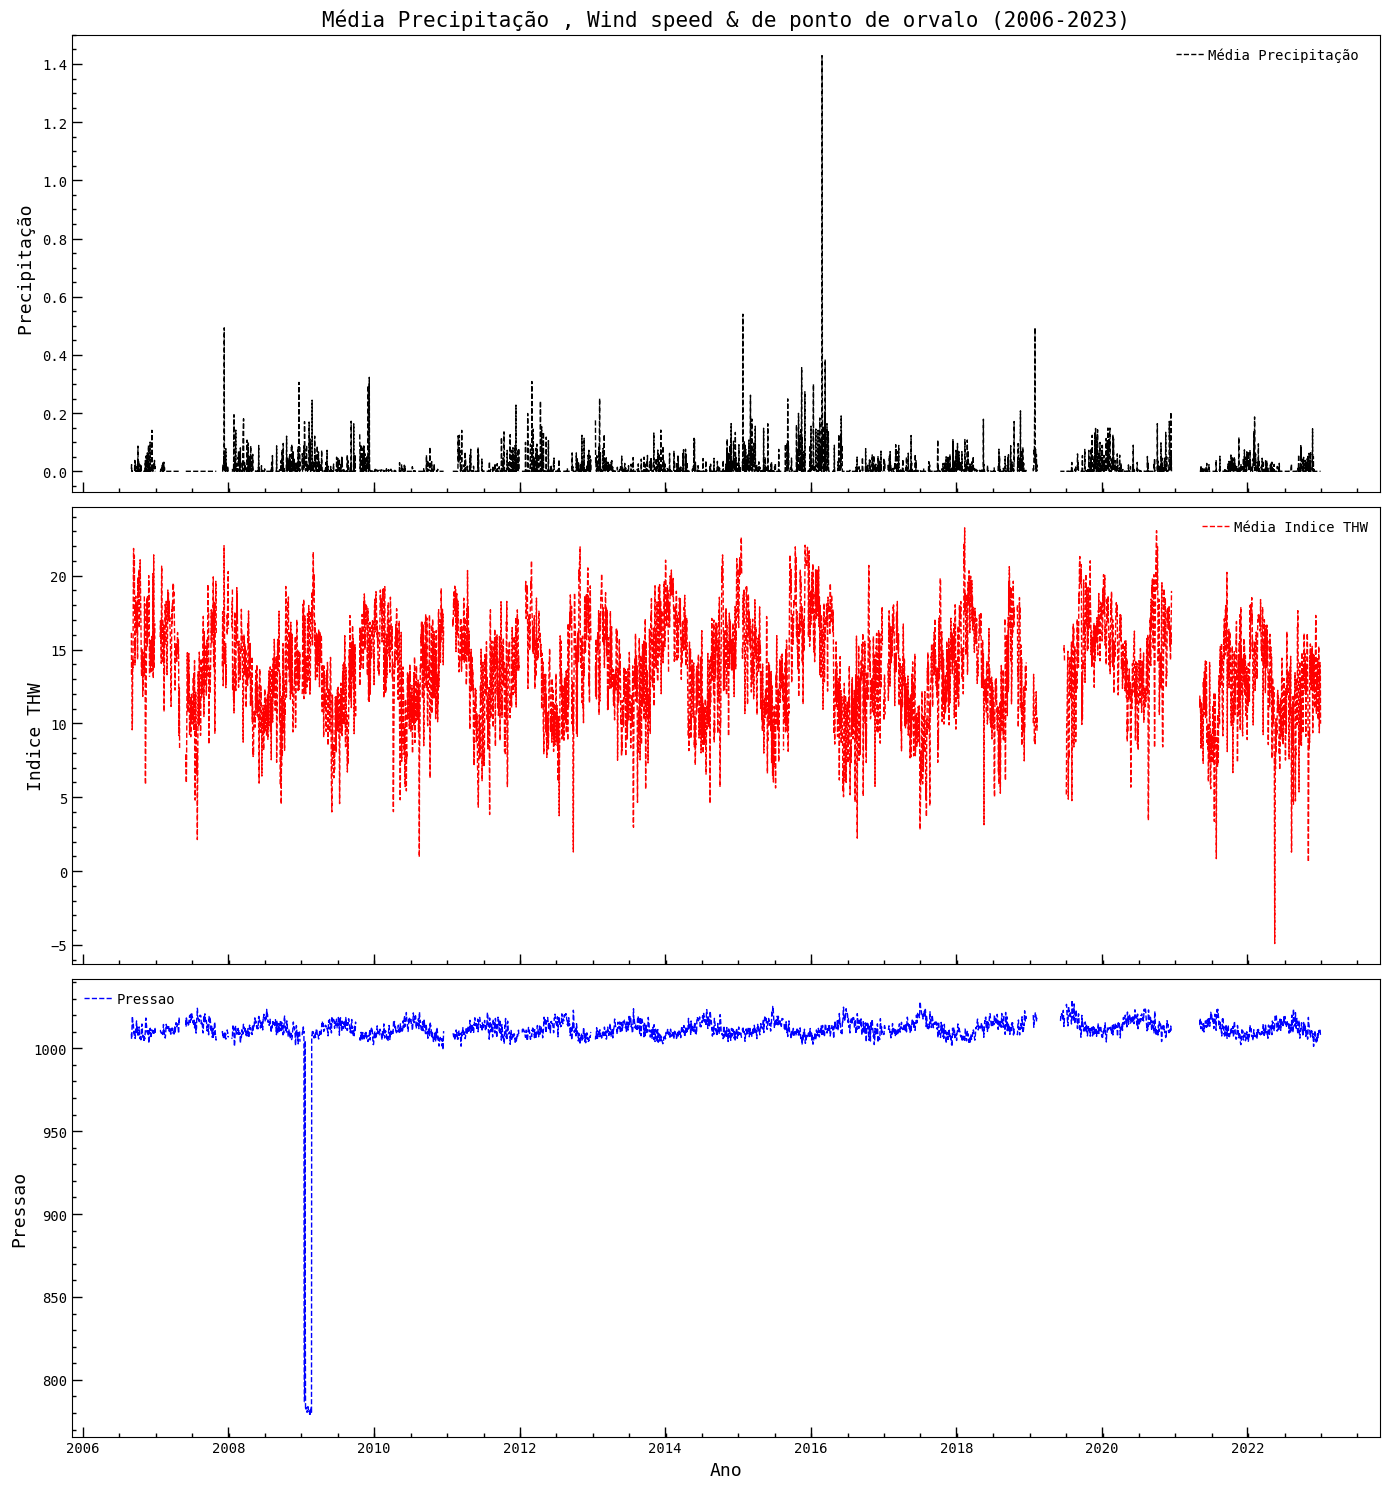

In [13]:
mean_data = data[['rain', 'THW_index', 'bar']].resample('D').mean()

# Criando subplots
fig, axs = plt.subplots(3, 1, figsize=(14, 15), sharex=True)

# Plotando a média da temperatura externa
axs[0].plot(mean_data.index, mean_data['rain'], label='Média Precipitação ', color='black', linestyle='--', linewidth=1)
axs[0].set_ylabel('Precipitação ')
axs[0].set_title('Média Precipitação , Wind speed & de ponto de orvalo (2006-2023)')
axs[0].legend()
#axs[0].grid(True)

# Plotando a média da temperatura máxima
axs[1].plot(mean_data.index, mean_data['THW_index'], label='Média Indice THW', color='red', linestyle='--', linewidth=1)
axs[1].set_ylabel('Indice THW')
#axs[1].set_title('Média Temperatura Máxima (2006-2023)')
axs[1].legend()
#axs[1].grid(True)

# Plotando a média da temperatura mínima
axs[2].plot(mean_data.index, mean_data['bar'], label='Pressao', color='blue', linestyle='--', linewidth=1)
axs[2].set_ylabel('Pressao')
axs[2].set_xlabel('Ano')
#axs[2].set_title('Média Temperatura Mínima (2006-2023)')
axs[2].legend()
#axs[2].grid(True)


# Ajustando layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()




<AxesSubplot: xlabel='datetime'>

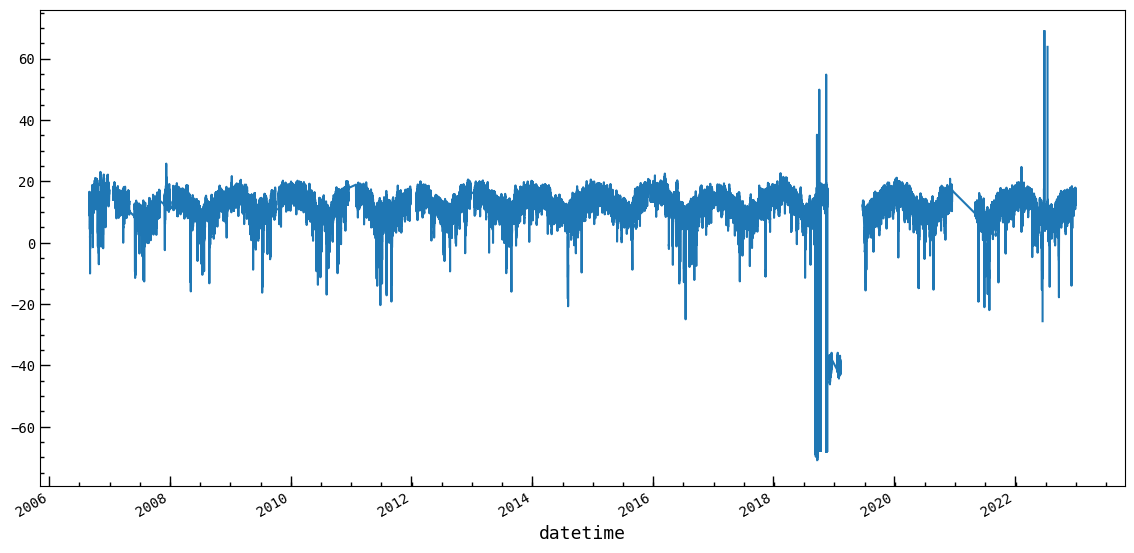

In [24]:
# calculo do ponto de Orvalo
rh = data['out_hum']
T=  data['temp_out']
TD = (rh/100) ** 0.125 *(112+0.9*T)+ 0.1*T-112
TD.plot()

# Calcular la correlación


In [32]:
obs = data['dew_pt']
mask = ~np.isnan(TD) & ~np.isnan(obs)
x_clean =TD[mask]
y_clean = obs[mask]

#correlacion, p_valor = stats.pearsonr(TD, data['dew_pt'])
correlacion, p_valor = stats.pearsonr(x_clean, y_clean)

# Imprimir los resultados
print(f"Coeficiente de correlación: {correlacion}")
print(f"Valor p: {p_valor}")



Coeficiente de correlación: 0.9998946441397936
Valor p: 0.0


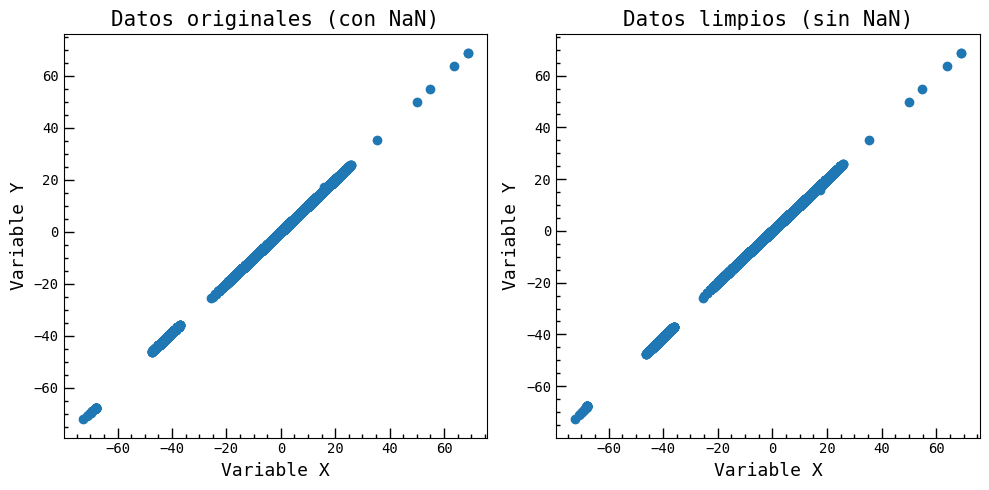

In [35]:
# Visualizar los datos
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(obs, TD)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Datos originales (con NaN)')

plt.subplot(1, 2, 2)
plt.scatter(x_clean, y_clean)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Datos limpios (sin NaN)')

plt.tight_layout()
plt.show()

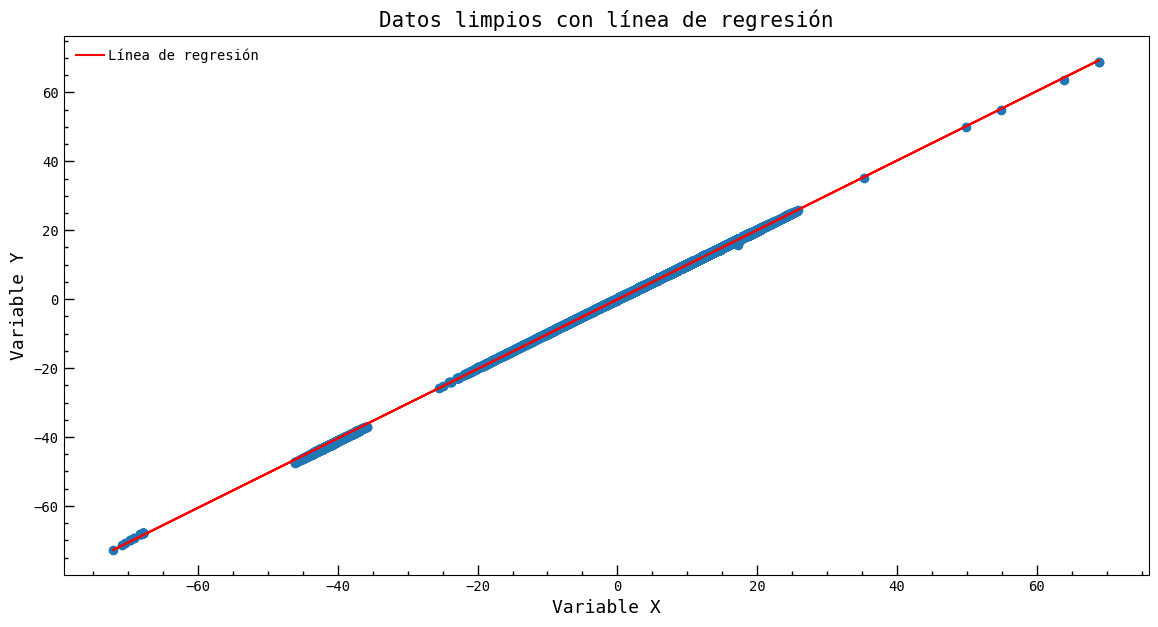

In [37]:
# Calcular la línea de regresión
pendiente, intercepto, r_valor, p_valor, std_err = stats.linregress(x_clean, y_clean)

# Crear la línea de regresión
linea = pendiente * x_clean + intercepto

# Visualizar los datos limpios con la línea de regresión
plt.scatter(x_clean, y_clean)
plt.plot(x_clean, linea, color='red', label='Línea de regresión')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Datos limpios con línea de regresión')
plt.legend()
plt.show()

Coeficiente de correlación de Pearson: 0.9998946441397936
Valor p: 0.0


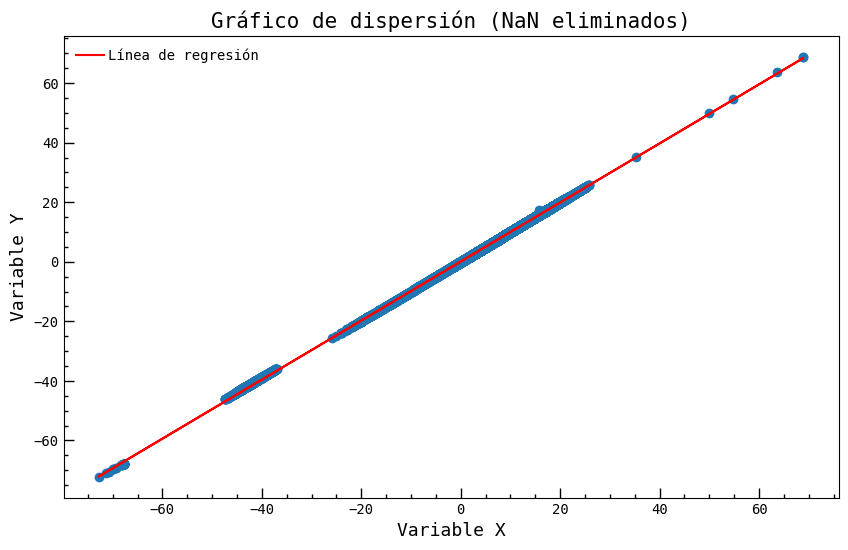


Número total de puntos de datos: 1194513
Número de puntos de datos después de eliminar NaN: 1173617
Número de puntos de datos eliminados: 20896


In [39]:
x = data['dew_pt']
y = TD
# Crear un DataFrame de pandas
df = pd.DataFrame({'x': x, 'y': y})

# Eliminar filas con NaN
df_clean = df.dropna()

# Calcular la correlación de Pearson
correlacion, p_valor = stats.pearsonr(df_clean['x'], df_clean['y'])

# Imprimir los resultados
print(f"Coeficiente de correlación de Pearson: {correlacion}")
print(f"Valor p: {p_valor}")

# Visualizar los datos
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['x'], df_clean['y'])
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Gráfico de dispersión (NaN eliminados)')

# Calcular y dibujar la línea de regresión
pendiente, intercepto, r_valor, p_valor, std_err = stats.linregress(df_clean['x'], df_clean['y'])
linea = pendiente * df_clean['x'] + intercepto
plt.plot(df_clean['x'], linea, color='red', label='Línea de regresión')

plt.legend()
plt.show()

# Imprimir información sobre los datos eliminados
print(f"\nNúmero total de puntos de datos: {len(df)}")
print(f"Número de puntos de datos después de eliminar NaN: {len(df_clean)}")
print(f"Número de puntos de datos eliminados: {len(df) - len(df_clean)}")
